[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
391/391 ━━━━━━━━━━━━━━━━━━━━ 172s 427ms/step - accuracy: 0.7025 - loss: 0.5488 - val_accuracy: 0.7888 - val_loss: 0.4783
Epoch 2/2
391/391 ━━━━━━━━━━━━━━━━━━━━ 161s 412ms/step - accuracy: 0.8584 - loss: 0.3498 - val_accuracy: 0.8482 - val_loss: 0.3593
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 438ms/step


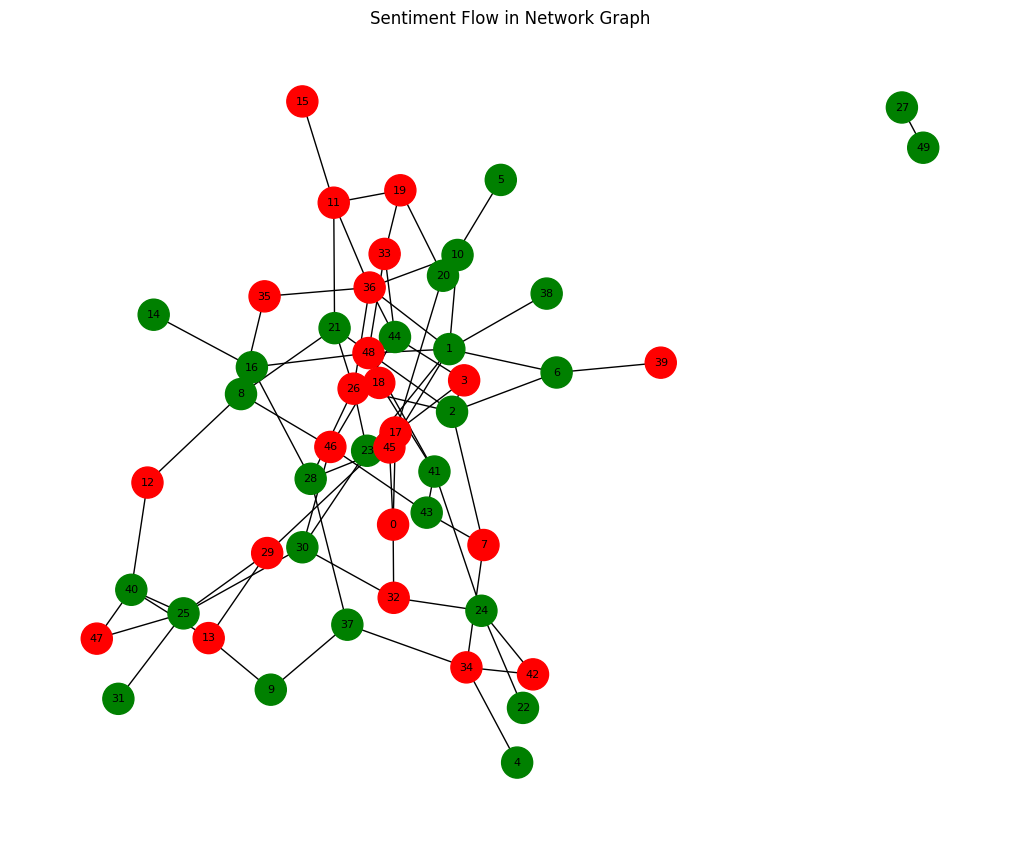

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
391/391 ━━━━━━━━━━━━━━━━━━━━ 155s 382ms/step - accuracy: 0.7077 - loss: 0.5493 - val_accuracy: 0.8442 - val_loss: 0.3643
Epoch 2/2
391/391 ━━━━━━━━━━━━━━━━━━━━ 221s 430ms/step - accuracy: 0.8527 - loss: 0.3465 - val_accuracy: 0.8515 - val_loss: 0.3578
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 473ms/step


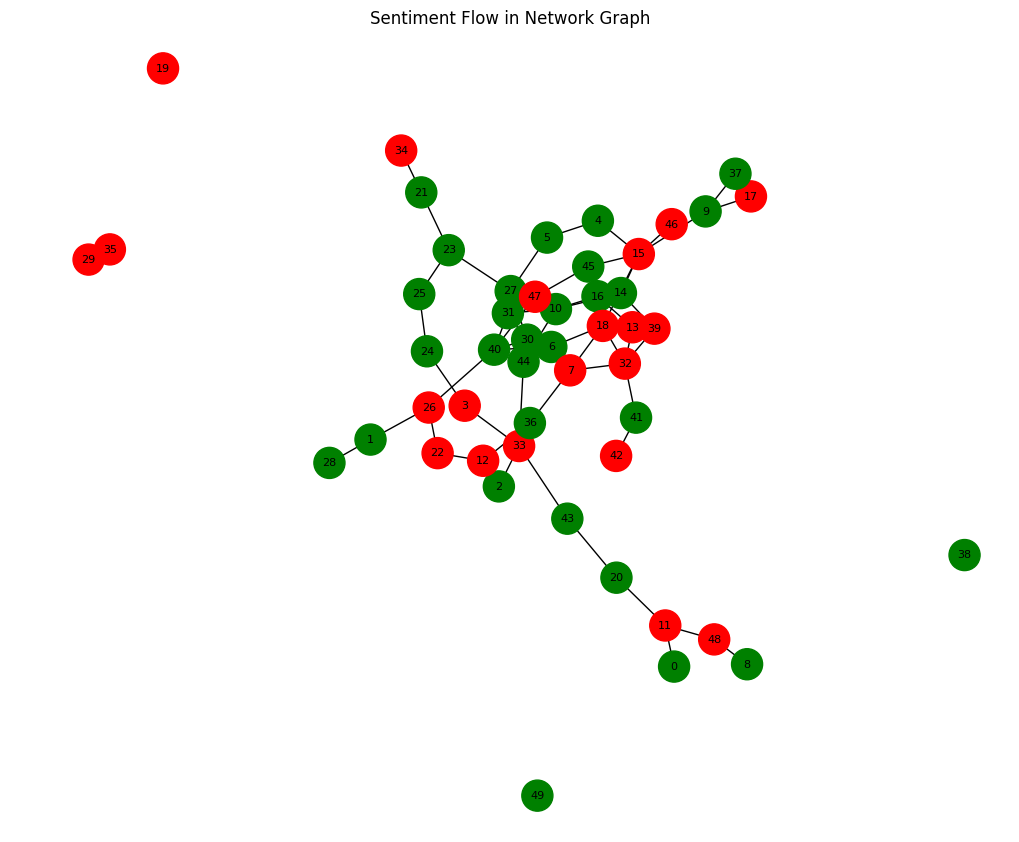

In [4]:
!pip install tensorflow matplotlib networkx nltk


import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import nltk
import networkx as nx
import random

nltk.download('punkt')

# Load IMDb dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

# Pad sequences
maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=maxlen),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(x_train, y_train, epochs=2, batch_size=64, validation_data=(x_test, y_test))


# Generate predictions for a sample set
sample_reviews = x_test[:50]
sample_preds = model.predict(sample_reviews)
sample_preds = sample_preds.flatten()

# Create graph
G = nx.Graph()

# Add nodes with sentiment
for i in range(len(sample_reviews)):
    sentiment = 'Positive' if sample_preds[i] > 0.5 else 'Negative'
    G.add_node(i, sentiment=sentiment)

# Add random edges (simulate topic connection or user interaction)
for i in range(len(sample_reviews)):
    for j in range(i+1, len(sample_reviews)):
        if random.random() < 0.05:  # sparsity
            G.add_edge(i, j)

# Draw graph
colors = ['green' if G.nodes[n]['sentiment'] == 'Positive' else 'red' for n in G.nodes]

plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color=colors, node_size=500, font_size=8)
plt.title("Sentiment Flow in Network Graph")
plt.show()
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import nltk
import networkx as nx
import random

nltk.download('punkt')

# Load IMDb dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

# Pad sequences
maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=maxlen),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(x_train, y_train, epochs=2, batch_size=64, validation_data=(x_test, y_test))


# Generate predictions for a sample set
sample_reviews = x_test[:50]
sample_preds = model.predict(sample_reviews)
sample_preds = sample_preds.flatten()

# Create graph
G = nx.Graph()

# Add nodes with sentiment
for i in range(len(sample_reviews)):
    sentiment = 'Positive' if sample_preds[i] > 0.5 else 'Negative'
    G.add_node(i, sentiment=sentiment)

# Add random edges (simulate topic connection or user interaction)
for i in range(len(sample_reviews)):
    for j in range(i+1, len(sample_reviews)):
        if random.random() < 0.05:  # sparsity
            G.add_edge(i, j)

# Draw graph
colors = ['green' if G.nodes[n]['sentiment'] == 'Positive' else 'red' for n in G.nodes]

plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color=colors, node_size=500, font_size=8)
plt.title("Sentiment Flow in Network Graph")
plt.show()

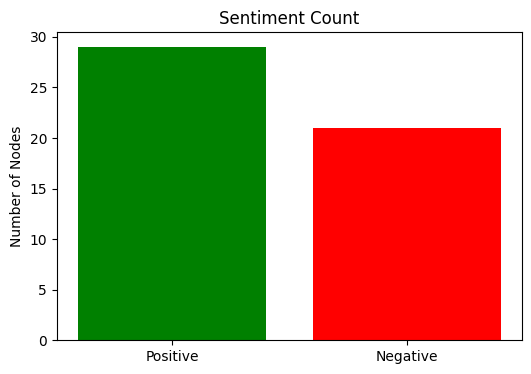

In [6]:
sentiments = [G.nodes[n]['sentiment'] for n in G.nodes]
positive_count = sentiments.count('Positive')
negative_count = sentiments.count('Negative')

plt.figure(figsize=(6, 4))
plt.bar(['Positive', 'Negative'], [positive_count, negative_count], color=['green', 'red'])
plt.title('Sentiment Count')
plt.ylabel('Number of Nodes')
plt.show()
